In [2]:
import os
os.chdir('../')
import pandas as pd
from multimodal_net.models import my_alexnet
from multimodal_net import datasets
from multimodal_net import video_transforms
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
from torchvision import transforms
import torch
from sklearn.metrics import confusion_matrix

In [3]:
train_csv='/home/mwysocz1/src/two-stream-pytorch/datasets/letsdance_splits/train_final.csv'
test_csv='/home/mwysocz1/src/two-stream-pytorch/datasets/letsdance_splits/test.csv'
val_csv='/home/mwysocz1/src/two-stream-pytorch/datasets/letsdance_splits/val.csv'

In [4]:
train_df = pd.read_csv(train_csv, sep='\t', names=['target', 'filename', 'duration'])
test_df = pd.read_csv(test_csv, sep='\t', names=['target', 'filename', 'duration'])
val_df = pd.read_csv(val_csv, sep='\t', names=['target', 'filename', 'duration'])

In [5]:
df = train_df.append(test_df, ignore_index=True)
df=df.append(val_df, ignore_index=True)
df=df[df.duration!=1]

In [7]:
df.head()

,target,filename,duration
0,samba,Lb-LLPO0aIs_026,251
1,foxtrot,AdRl3japXJ4_057,301
2,pasodoble,ftq0WWSr-fs_047,301
3,cha,zJ392rOjAP8_039,251
4,ballet,hAQs_rlyCKo_148,201


In [8]:
df.describe()

,duration
count,1388.000000
mean,280.424352
std,40.450412
min,51.000000
25%,251.000000
50%,301.000000
75%,301.000000
max,602.000000


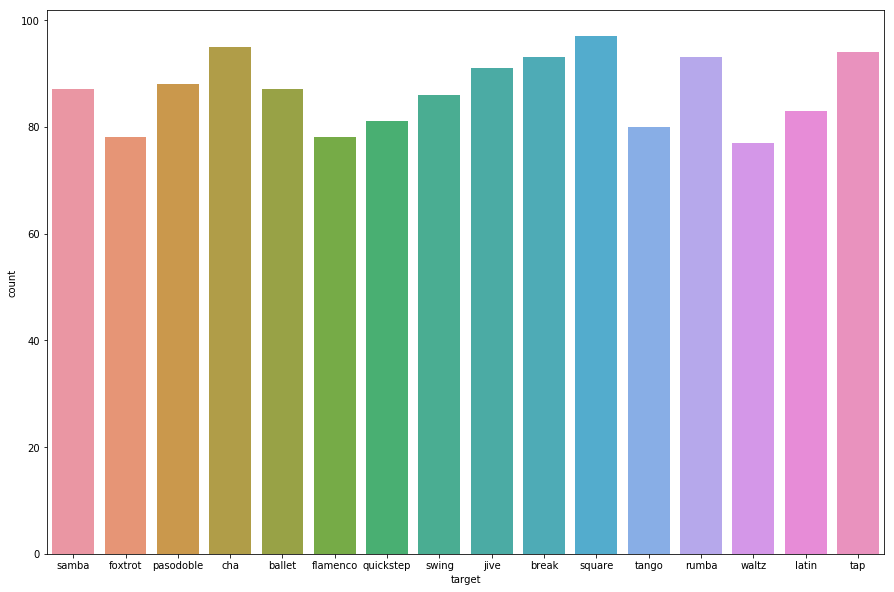

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df.target)

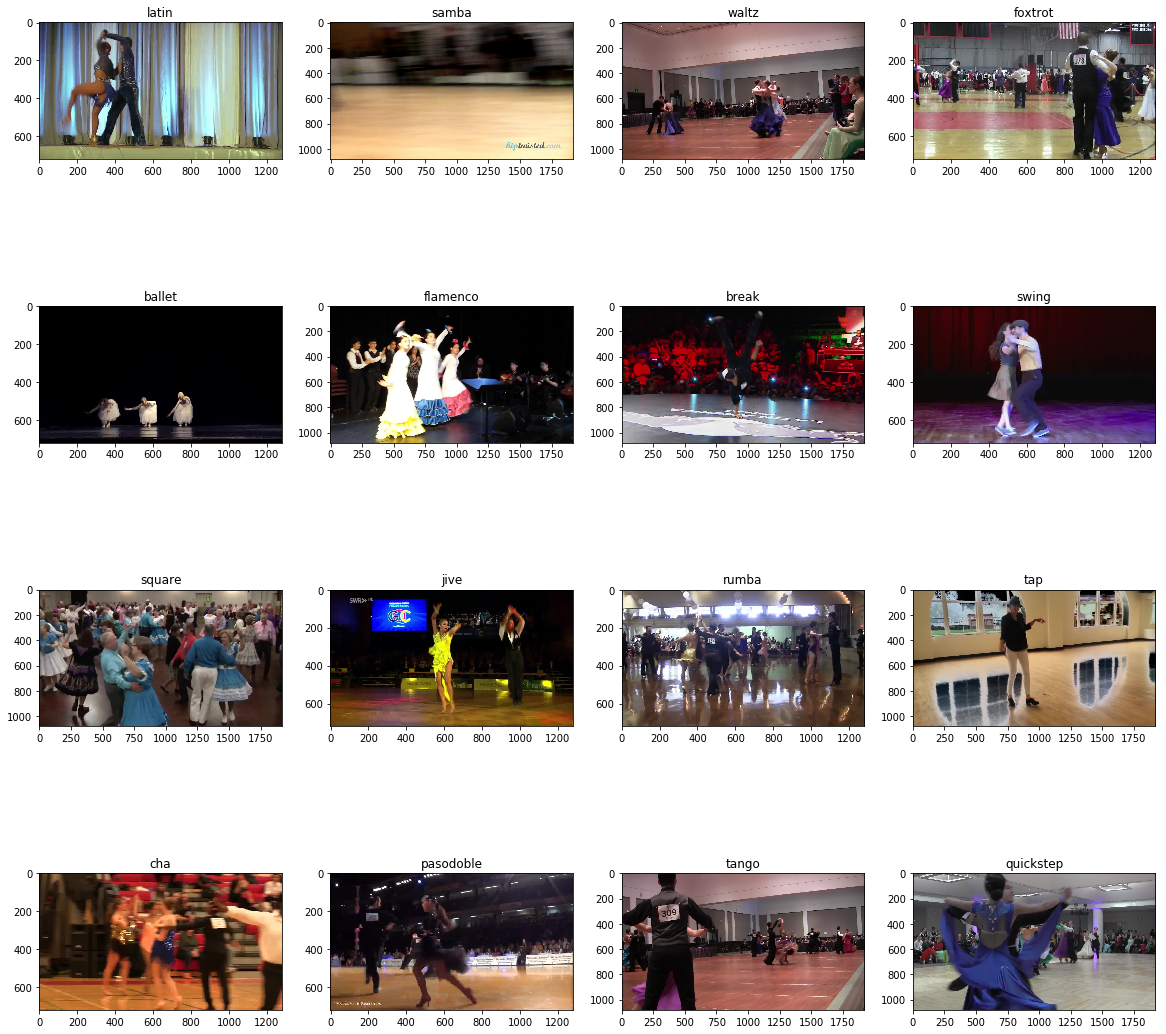

In [26]:
data_dir = '/data/trackml/letsdance/rgb'
fig=plt.figure(figsize=(20, 20))
classes = os.listdir(data_dir)

for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, class_files[np.random.randint(0, len(class_files))]))
    fig.add_subplot(4, 4, ids+1, title=cls)

    plt.imshow(img)


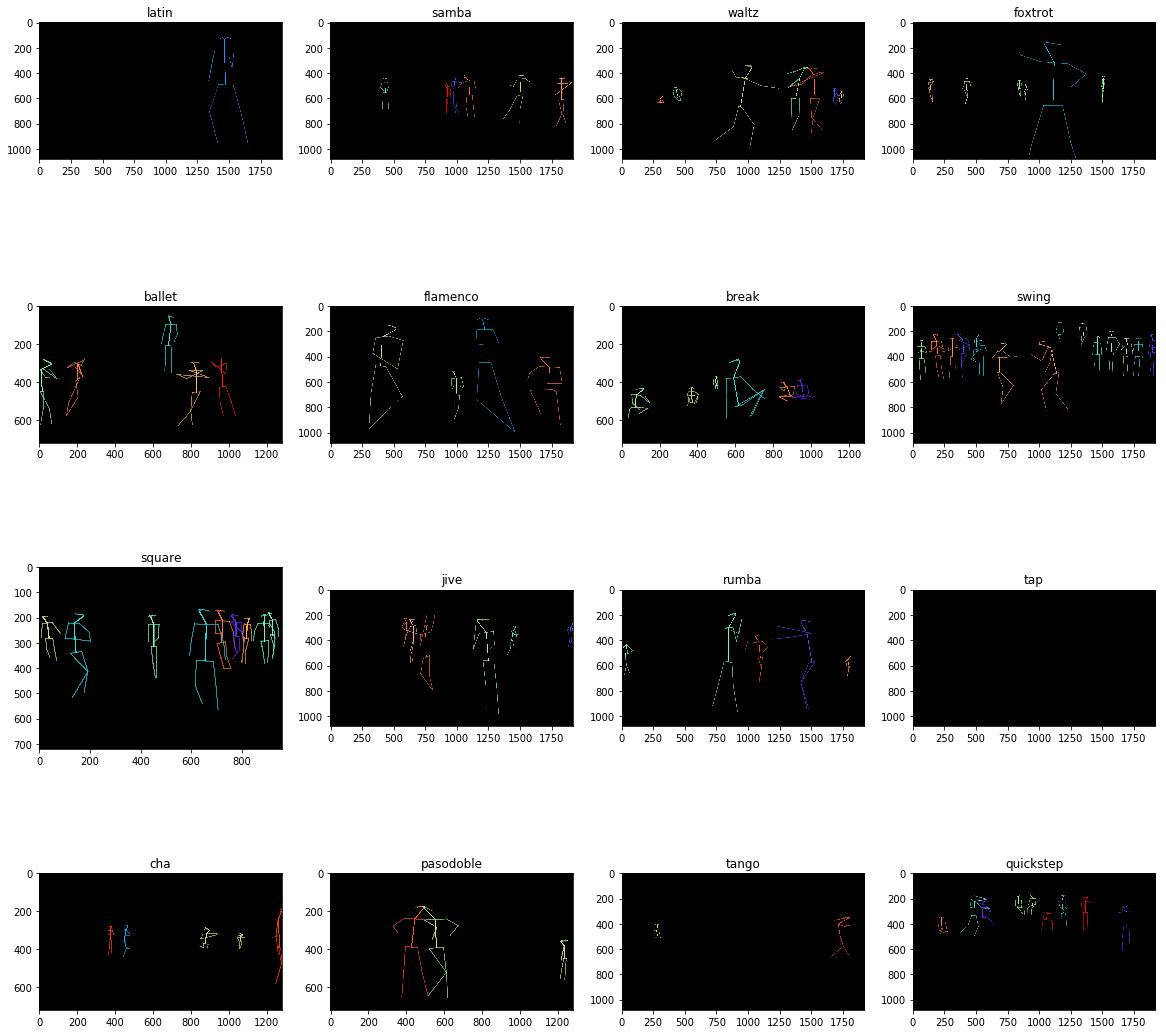

In [28]:
data_dir = '/data/trackml/letsdance/densepose/rgb'
fig=plt.figure(figsize=(20, 20))

for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, class_files[np.random.randint(0, len(class_files))]))
    fig.add_subplot(4, 4, ids+1, title=cls)

    plt.imshow(img)

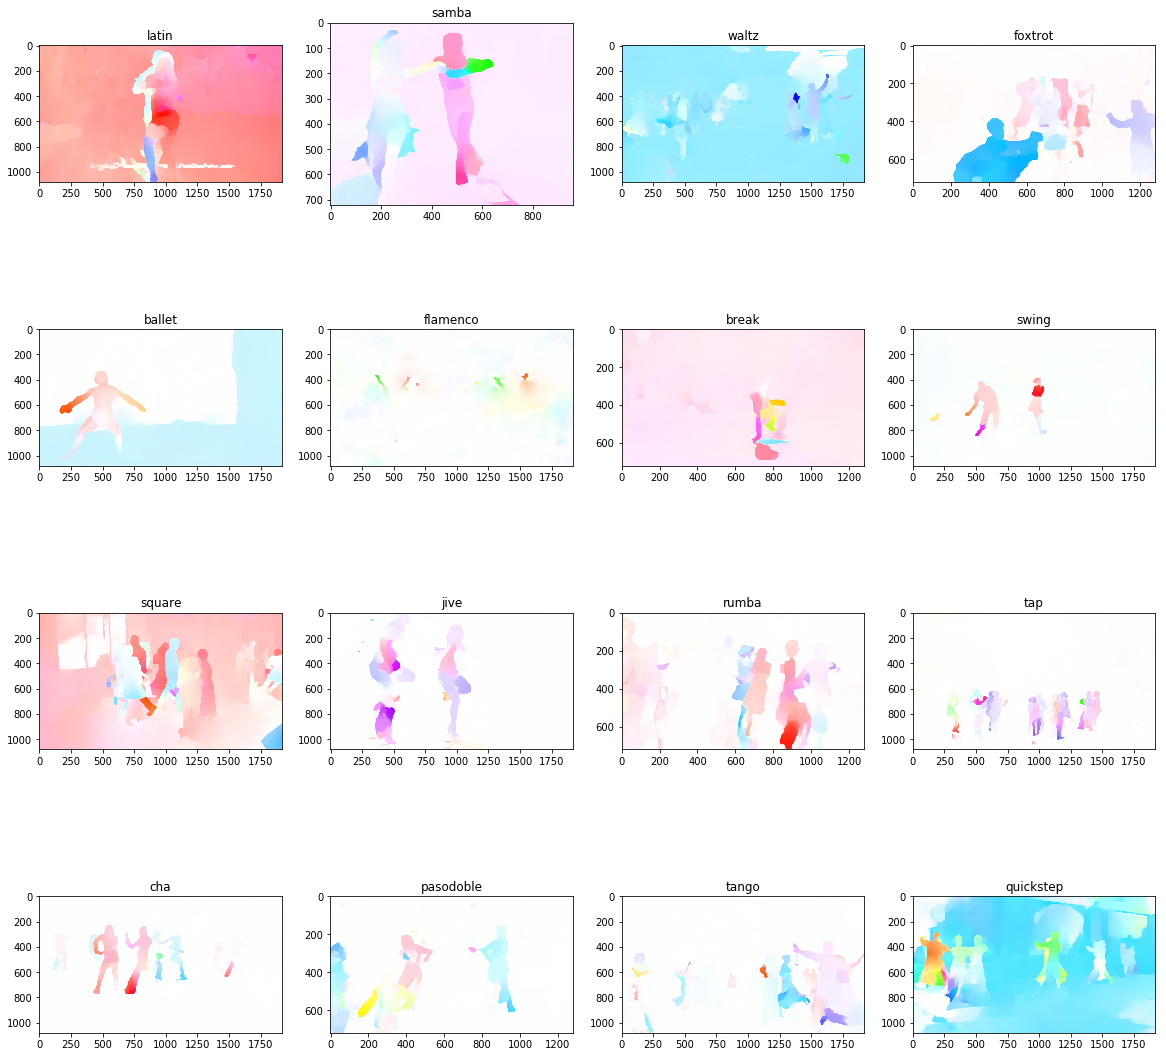

In [30]:
data_dir = '/data/trackml/letsdance/flow_png'
fig=plt.figure(figsize=(20, 20))

for ids, cls in enumerate(classes):
    class_files= os.listdir(os.path.join(data_dir, cls))
    img = mpimg.imread(os.path.join(data_dir, cls, class_files[np.random.randint(0, len(class_files))]))
    fig.add_subplot(4, 4, ids+1, title=cls)

    plt.imshow(img)